# <div style="text-align: center">  Analyzing and Measuring Rising Sea Levels 
<div style="text-align: center">**Authors: TingFang Pan and Wendy C. Velasquez Ebanks** </div>



In [1]:
# Libraries  required for the resalization of this project
import nbconvert
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import IPython
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\Wendy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## I. Introduction

<div style="text-align: justify">In the last years, we have seen an accelerating rising on sea levels around the world. Climate change and human activity are part of the two main causes: first of all, by warming ocean water; as it warms, water expands, taking up more space on earth. Second, by melting land-based ice (glaciers and ice sheets), sending more water to our oceans [[9]](https://www.nationalgeographic.com/environment/global-warming/sea-level-rise/). Consequently, if they keep increasing at an accelerated rhythm as we have seen, even smallest increases will have devastating effects on coastal habitats. As seawater reaches farther inland, it will cause destructive erosion, wetland flooding, aquifer and agricultural soil contamination, additionally, lost habitat for fish, birds, and plants. As such, our intend with the realization of this project is to analyze and measure sea levels in at least both coasts of the US, in order to identify and predict how this will affect the mainland.
By doing this we will be able to identify vulnerable areas, that could suffer from the rising sea levels in subsequent years, based on our predictions.The data used for this study were collected from National Oceanic Atmospheric Administration (NOAA)'s website on sea levels measurements. We did the necessary pre-processing for the **US dataset only**. we began by choosing three years (1997, 2008, and 2016) as a test, then we used continues data from years (2000 - 2016) for predictions and forecasting on the next two years. We calculated the probability of sea level increment on both coasts; we used a supervised machine learning algorithm, such as the Time Series Model and the ARIMA model. 
We consider this a subject worth discussing as it has a direct impact on everyone as well as higher impact on future generations. </div>    

C:\Users\Wendy\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'The American Continent and both oceans in the globe')

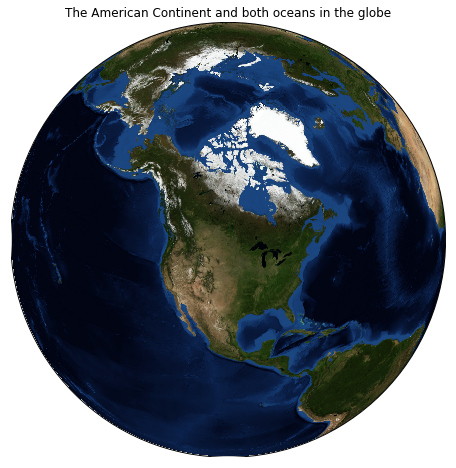

In [6]:
# defines the size of the image displayed
plt.figure(figsize=(8, 8))

#Projection type
worldMap = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)

# defines the color of the map
worldMap.bluemarble(scale=0.5);
plt.title("The American Continent and both oceans in the globe")

## II. Background

Recently, we have seen an accelerating rising in sea levels around the world; these are measured constantly around the world through tide stations and satellite laser altimeters. Thus, the reading of tide gauge and satellite measurements, tell us that from last century to these days, the Global Mean Sea Level (GMSL) rose  4 to 8 inches which is from 10 to 20 centimeters more of the shore [[3]](https://oceanservice.noaa.gov/facts/sealevel.html). In addition, the tide stations around the globe tell the story of what is happening at a local level. By measuring the height of the water along the coast and with respect to an specific point on land [[8]](https://www.nasa.gov/feature/goddard/2018/new-study-finds-sea-level-rise-accelerating). Climate change and human activity are part of the two main causes: first of all, by warming ocean water; as it warms, water expands, taking up more space on earth. Second, by melting land-based ice (glaciers and ice sheets), sending more water to our oceans [[9]](https://www.nationalgeographic.com/environment/global-warming/sea-level-rise/). Moreover, over the past 20 years, the annual rate of rise  has been 0.13 inches (3.2 millimeters) a year, roughly twice the average speed of the preceding 80 years [[3]](https://oceanservice.noaa.gov/facts/sealevel.html).


Previous research and records about sea level discussed the increasing acceleration on sea levels over the last 40 years. Church and White [[1]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826) have worked on data from 1950 to 2000, on which they found a significant acceleration on sea levels  from1993 forward. If the levels keep increasing at an accelerated rhythm as we have seen, even smallest increases will have devastating effects on coastal habitats.Moreover, this team worked on data from 1870 and found a significant sea‐level rise from January 1870 to December 2004 of 195 mm. A rate of increase per year of 1.7 ± 0.3 mm yr−1 up to that point in time, and an acceleration of  0.013 ± 0.006 mm yr−2 in subsequent years [[1]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826).


A method commonly used among several studies reviewed dealt with local data, (usually tide gauge data) or regional/global averages, in order to determine when and where the levels may or may not have accelerated during a specific period of time during the last century. This process is consistent among all the studies (how they processed and used the data). However, for them to have good results the study must cover a long period of time to see the difference from one point in time to another  [[2]](https://www.researchgate.net/publication/265467321_Time_and_tide_analysis_of_sea_level_time_series). Additionally, the mathematical model used for visualization of such data are all based on a time series model, a supervised learning model allowing to see graphically the escalating increments throughout the years in question.

## III. Process and Methodology 

The process for this study consists in the  preprocessing and collection of datasets for each city on the East and West coasts of the United States, provided by the National Oceanic Atmospheric Administration (NOAA).

The datasets contain data recorded on sea levels by day, month and year per each of the cities close to the edge of the beach on both sides. This datasets were classified as **East** and **West** and then each city dataset cleaned to obtain only three points in time (1997, 2008, 2016) and data from 2000 to 2016 for predictions and forecasting on subsequent years. Lastly, concatenated in order to make just 2 big datasets that could then be more useful to fit the data in the Time Series Model for prediction and forecasting. 

First, we read the raw files downloaded into dataframes. Then We divided the datasets into two types: 
- One is more detailed(described the hours sea_level situation)
- One is relatively simpler(described the days sea_level situation). 

The four files into four dictionaries, for each dictionary, we designated the filename as the key, and the values what is contained in each of the files read from the dataset.

In [ ]:
east_dir = "DATA/east_new"
west_dir = "DATA/west_new"
east_dir_list = os.listdir(east_dir)
west_dir_list = os.listdir(west_dir)
east_d_dict = {} # key is a file name(string type), item is a dataframe
east_h_dict = {}
west_d_dict = {}
west_h_dict = {}
for east_fname in east_dir_list:
    file_directory = east_dir + "/" + east_fname 
    #read csv file to dataframe from file_directory
    
    k = east_fname.rfind(".")
    d_or_h_index = k - 1 #determine whether the file is about d or about h
    
    if(east_fname[d_or_h_index] == 'd'):
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day", "sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        east_d_dict[east_fname] = df_file
    else:
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day","hour","sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        east_h_dict[east_fname] = df_file

for west_fname in west_dir_list:
    file_directory = west_dir + "/" + west_fname 
    #read csv file to dataframe from file_directory
    
    k = west_fname.rfind(".")
    d_or_h_index = k - 1 #determine whether the file is about d or about h
    
    if(west_fname[d_or_h_index] == 'd'):
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day", "sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        west_d_dict[west_fname] = df_file
    else:
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day","hour","sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['hour','day','month','year']])
        west_h_dict[west_fname] = df_file
#print([key for key in west_h_dict])
print(west_h_dict["Cordova_h.csv"])

### Methodology: Time Series Model 

By definition A **"Time Series"** analysis is the process of using statistical techniques to model and explain a time-dependent series of data points. Time series forecasting is the process of using a model to generate predictions (forecasts) for future events based on known past events [[4]](https://wiki.pentaho.com/display/DATAMINING/Time+Series+Analysis+and+Forecasting+with+Weka#TimeSeriesAnalysisandForecastingwithWeka-1Introduction). Consequently, this model fits our data for this study perfectly.

>![time_series_graph](PDS_FINAL/timeseriesim.png)


Where we have observations $X_1\ldots,X_n$ and $X_t$ denotes the observation at time 𝑡. In terms of machine learning,  we consider the prediction problem as a problem of supervised learning problem, where we have to infer from historical data the possibly nonlinear dependence between the input (past data sea levels) and the output (future of rising sea levels).
We will use methods to reduce trends, seasonality, leaving the stationary to make the forecasts by using the following equations to make the respective calculations that will provide the desired results.

> ### The Autoregressive Model: AR
> An autoregressive model predicts the response $X_t$ using a linear combination of past values of the variable. Parameterized by 𝑝, (the number of past values to include).

> $$X_t = \mathbf\theta_0 + \mathbf\theta_1 X_(t-1) + \mathbf\theta_2 X_(t-2) + \mathbf\theta_p X_(t-p)$$

> ### The ARIMA Model for Predictions and Forecasting

> We Combined a autoregressive (AR) with the moving average (MA) model, to get the ARIMA model.

> $$X_t = \mathbf\theta_0 + \mathbf\theta_1 X_(t-1)_ + \mathbf\theta_2 X_(t-2)_ + \mathbf\theta_p X_(t-p) + \mathbf\beta_0  + \mathbf\beta_1 \in_(t-1) + \mathbf\beta_2 \in_(t-2)+ \mathbf\beta_q \in_(t-q)$$

> Note that now we are regressing on $X'_t$, which is the differenced series $X_t$. The order
of difference is determined by the the parameter 𝑑. For example, if 𝑑 = 1:

> $$X'_t = X_t − X_(t-1)$ for $t = 2, 3,…,N $$

>So the ARIMA model is parameterized by: p (order of the AR part), q (order of the MA
part), and d (degree of differencing).

### Our Main Area of Focus

In [ ]:
#dimensions of the figure
fig = plt.figure(figsize=(8, 8))

#Projection of the map
USmap = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)

# Topografic Scale
USmap.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
#coordinates of the points that signalize both coasts
x, y = USmap(-121.5, 60.5)
x1, y1 = USmap(-127.3, 38.7)

# adds the point and title to both sides of the map
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, ' West Coast', fontsize=12);
plt.plot(y, x, 'ok', markersize=5)
plt.text(y, x, ' East Coast', fontsize=12);
plt.title("US Coasts")

## IV. Calculations, and Findings  
After the pre-pocessing the information we plotted the information on the three years selected. from this we part our initial observations:

In [ ]:
# Individual graphs on sea levels for only one city with the initial three points in time chosen 
# 1997, 2008, and 2016

pdf = west_d_dict['Cordova_d.csv']
df = pdf.loc[(pdf['year'] == 1997)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('date', fontsize = 12)
plt.ylabel('sea_level', fontsize = 12)
plt.title('sea_level_Cordaova_1997', fontsize = 14)
plt.show()

df = pdf.loc[(pdf['year'] == 2008)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('date', fontsize = 12)
plt.ylabel('sea_level', fontsize = 12)
plt.title('sea_level_Cordaova_2008', fontsize = 14)
plt.show()

df = pdf.loc[(pdf['year'] == 2016)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('date', fontsize = 12)
plt.ylabel('sea_level', fontsize = 12)
plt.title('sea_level_Cordaova_2016', fontsize = 14)
plt.show()

### Removing Trend and Seasonality
The most significant part preprocessing data on time series problems is removing trend and seasonality from the dataset. To make the predictions we used data from 2000 and forward and removed trend and seasonality, so we could obtain the stationary data. 

We created a rolling function that will successfully measured the trend, we used a sliding window of 365 days for it.

In [ ]:
df = pdf.loc[(pdf['year'] >= 2000)]
moving_avg = df['sea_level'].rolling(365).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], moving_avg)
plt.xlabel('date', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title('sea_level\'s trend', fontsize=14)
plt.show()

The graph below contains our data after Removing the trend from it. 

In [ ]:
detrended = df['sea_level'].diff()
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], detrended)
plt.xlabel('date', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title('sea_level after removing trend', fontsize=14)
plt.show()

This next graph display our results after removing both trend and seasonality from the data.

In [ ]:
seasonal_diff = detrended.diff(365)
#print(type(seasonal_diff)
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], seasonal_diff)
plt.xlabel('date', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title('sea_level after removing seasonality', fontsize=14)
plt.show()

### The Forecasting Process

We will predict sea levels for the next 24 months in 2017 and 2018; with data of  the last 204 months, counting from 2000 to 2016.

The data is very dense when plotting it, so we use the means of sea levels within a month to compress the data and have a better display and consistency. After that we store the result in a new dataframe called avg_month_df, on which each line represents the average sea level in that month. 

In [ ]:
avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','line_num'))
line_num = 0
for year in range(2000, 2017):
    year_df = df[df['year'] == year]
    for month in range(1, 13):
        month_df = year_df[year_df['month'] == month]
        days_in_a_month = (month_df.shape[0])
        sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
        avg_month_df.loc[line_num] = [year, month, sea_level_avg,line_num + 1]
        line_num += 1

print(avg_month_df) 

Then we used the **ARIMA** model to get the  final result.

In [ ]:
#print(new_df_list[0]['sea_level'].tolist())
model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
result = model.fit()
print(result.summary().tables[1])

Once we fitted our data wit the ARIMA more we could start predictions for the next 24 months (2017, 2018) and form a new dataframe containing, columns of _months(from 20171.1 and forward)_, predict _result(mean)_, upper y _(largest predict result)_, lower y _(smallest predict result)_.

In [ ]:
pred = result.get_forecast(steps=24)
pred_point = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.01)
all_months = [i for i in range(1,25)]
tuple_data = zip(all_months, pred_point)
pred_data = [list(item) for item in tuple_data]
pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result'])

pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]#add the lower result and the upper result to the result
print(pred_df)

Now we can show the resulting prediction. The previous graph is the result of the last 204 months. And the second graph shows the actual forecast. The pink area in the graph is the range the sea level could reach at that time point in time either low or high. 

In [ ]:
fig = plt.figure(figsize=(14,6))
#plt.plot(avg_month_df['sea_level'], label='Observed')
plt.plot(avg_month_df['line_num'],avg_month_df['sea_level'])


plt.xlabel('total_months_from_2000', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title("sea_level before",
fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.show()
all_months = [i for i in range(1,25)]
tuple_data = zip(all_months, pred_point)
pred_data = [list(item) for item in tuple_data]


pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result'])

plt.plot(pred_point)
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],color='m', alpha=.15, label='99% Conf Int')
plt.xlabel('total_months_from_2017', fontsize=12)
plt.ylabel('sea_level', fontsize=12)
plt.title("sea_level predict in the next 24 months",
fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.show()
plt.show()

### Predict all the areas
Finally, we used the same method to predict the sea level forecast in all the areas that cover West and East coasts of United States.

**Note.-** We do not count dataframes that had spurious data or that the required years were not in the dataset.

In [ ]:
for key in east_d_dict:
    df = east_d_dict[key].loc[(east_d_dict[key]['year'] >= 2000)]#keep the years after 2000
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        if(year_df.shape[0] < 365):#if the year's day number is fewer than 365, there must be a lack
            del east_d_dict[key]
for key in west_d_dict:
    df = west_d_dict[key].loc[(west_d_dict[key]['year'] >= 2000)]#keep the years after 2000
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        if(year_df.shape[0] < 365):#if the year's day number is fewer than 365, there must be a lack
            del west_d_dict[key]

The predictions below are divided in East and West coasts, so the first graph contain the estimated forecast for the next 24 months in the East coast, and the second the next 24 months for the West coast.

In [ ]:
east_d_pred = {}

for key in east_d_dict:#predict the east areas
    
    df = east_d_dict[key]
    df = df[df['year'] >= 2000]
    avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','all_months'))
    
    all_months = 0
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        
        for month in range(1, 13):
            month_df = year_df[year_df['month'] == month]
            days_in_a_month = (month_df.shape[0])
            sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
            avg_month_df.loc[all_months] = [year, month, sea_level_avg,all_months + 1]
            #print(avg_month_df)
            #print("\n")
            all_months += 1
    #print(key,avg_month_df)
    #print("\n")
    model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
    result = model.fit()
    pred = result.get_forecast(steps=24)
    pred_point = pred.predicted_mean
    pred_ci = pred.conf_int(alpha=0.01)
    pred_df = pd.DataFrame(pred_point)
    all_months = [i for i in range(1,25)]
    tuple_data = zip(all_months, pred_point)
    pred_data = [list(item) for item in tuple_data]
    pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result_mean'])
    pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
    pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]
    east_d_pred[key] = pred_df

In [ ]:
west_d_pred = {}
for key in west_d_dict:#do the same as west areas
    
    df = west_d_dict[key]
    df = df[df['year'] >= 2000]
    avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','all_months'))
    
    all_months = 0
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        
        for month in range(1, 13):
            month_df = year_df[year_df['month'] == month]
            days_in_a_month = (month_df.shape[0])
            sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
            avg_month_df.loc[all_months] = [year, month, sea_level_avg,all_months + 1]
            all_months += 1
    
    model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
    result = model.fit()
    pred = result.get_forecast(steps=24)
    pred_point = pred.predicted_mean
    pred_ci = pred.conf_int(alpha=0.01)
    pred_df = pd.DataFrame(pred_point)
    all_months = [i for i in range(1,25)]
    tuple_data = zip(all_months, pred_point)
    pred_data = [list(item) for item in tuple_data]
    pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result_mean'])
    pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
    pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]
    west_d_pred[key] = pred_df

We manage two dictionaries and in each dictionary, the key is the filename (city name), and the item is a dataframe itself. The dataframe has four columns: _months(from 2017.1 to 2018.12)_, _predresult(mean)_, _lower y(lower bound) and the upper y(upper bound)_.

Finally, we changed the key name from filename to a location name and obtained the following result:

In [ ]:
west_pred = {}
east_pred = {}
for key in east_d_pred:
    k = key.rfind("_")
    location_name = key[:k]
    east_pred[location_name] = east_d_pred[key]    
     
for key in west_d_pred:
    k = key.rfind("_")
    location_name = key[:k]
    west_pred[location_name] = west_d_pred[key]
#print(east_pred['Pensacola'])

### Limitations 
One of our limitations on this work relates to the different timeframes on which data started to be collected by the agency; therefore, the following cities are not included in our data set:

> **West Coast**
- Kaomalapau no data for years 1997, 2016 
- Nome and Willapa no data for 2016
- Portenllen no data in any of the years selected

> **East Coast**
- Cocoa Beach no data in any of the years selected
- Galveston no data for 2016
- May Port and south Path had no data for years 2008, 2016 

## V. Conclusions
1. Overall the Arima model on time series provide a great way to fit data that falls over periods of time, and even though it can be time intensive; gives us a good overview to see certain patterns in the data  over time.
2. Although there is a vast amount of data on sea levels, it is not all consistent, some cities have records olders than others, which adds as a limitation when doing this type of studies.
3. The more data we can have the more precise the results will  be.
4. Due to many factors such as global warming, volcanoes and pollution, that increases oceans temperature it difficult to predict based on past data, since those factors were not affecting in previous years.

**Note.-** Behind the realization of this project there was a great learning experience, Both participants learned from each other.

## References

1. [Church and N. White, "A 20th century acceleration in global sea-level rise", Geophysical Research Letters, vol. 33, no. 1, p. n/a-n/a, 2006.](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826)

2. [G. Foster and P. Brown, "Time and tide: analysis of sea level time series", Climate Dynamics, vol. 45, no. 1-2, pp. 291-308, 2014.](https://www.researchgate.net/publication/265467321_Time_and_tide_analysis_of_sea_level_time_series)

3. ["Is sea level rising?", Oceanservice.noaa.gov, 2018. Online.](https://oceanservice.noaa.gov/facts/sealevel.html) 

4. ["Time Series Analysis and Forecasting with Weka - Pentaho Data Mining - Pentaho Wiki", Wiki.pentaho.com, 2018. Online.](https://wiki.pentaho.com/display/DATAMINING/Time+Series+Analysis+and+Forecasting+with+Weka#TimeSeriesAnalysisandForecastingwithWeka-1Introduction)

5. [Time Series Optional Lecture](https://www.youtube.com/watch?v=ks6S2LnFWo8&feature=youtu.be)

6. [ VanderPlas, "Geographic Data with Basemap | Python Data Science Handbook", Jakevdp.github.io, 2018. Online.](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html)

7. ["matplotlib basemap toolkit — Basemap Matplotlib Toolkit 1.1.0 documentation", Matplotlib.org, 2018. Online.](https://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap)

8. ["New Study Finds Sea Level Rise Accelerating", NASA, 2018. Online](https://www.nasa.gov/feature/goddard/2018/new-study-finds-sea-level-rise-accelerating). 

9. ["Sea Level Rise", Nationalgeographic.com, 2018.](https://www.nationalgeographic.com/environment/global-warming/sea-level-rise/)